# Comprehending Comprehensions

By now, we'vge written a few `for` loops. Broadly speaking, these loops: 

1. Using each object in a collection of objects,
2. Do something with the item, either changing its value, or using its value to change other things
3. Output a final data structure or object

When you program, this is the kind of stuff that you do a LOT. Because programmers are lazy, we get frustrated when we have to type the same stuff over and over again, especially if this *design pattern* is used a lot. 

In [1]:
collection = range(10)
results = []
for item in collection:
    results.append((item **2, str(item)))
    print item
print results

0
1
2
3
4
5
6
7
8
9
[(0, '0'), (1, '1'), (4, '2'), (9, '3'), (16, '4'), (25, '5'), (36, '6'), (49, '7'), (64, '8'), (81, '9')]


To save space and be a bit more readable, python programmers developed the *comprehension* syntax. This is just a shortening of the regular `for` loop structure we discuss above. We can make the same results list using a list comprehension:

In [4]:
[(item**2, str(item)) for item in range(10)]

[(0, '0'),
 (1, '1'),
 (4, '2'),
 (9, '3'),
 (16, '4'),
 (25, '5'),
 (36, '6'),
 (49, '7'),
 (64, '8'),
 (81, '9')]

Let's break this down:

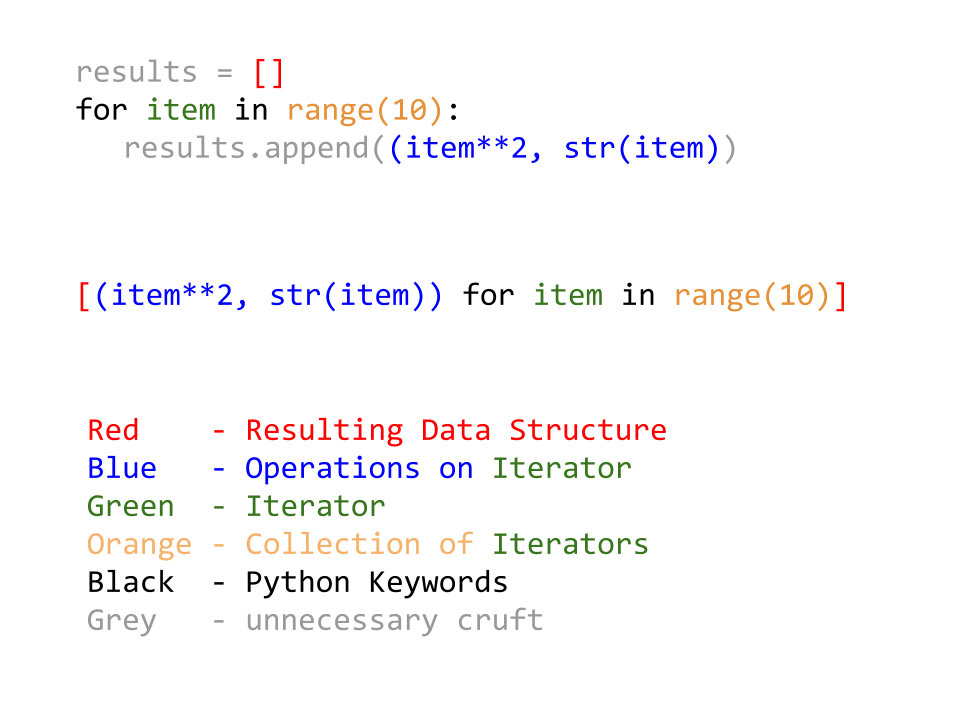

In [5]:
from IPython.display import Image
Image(filename='blank_list_comp.png')

### Problem: Self Improvement I

Below is a `for` loop we wrote before. Rewrite it as a list comprehension.

In [19]:
#not this cell, the next cell
f_counties = open('counties.txt')
import csv
cty = csv.reader(f_counties)
cty.next();

In [20]:
counties = []
for line in cty:
    counties.append(line[4])

In [21]:
#not this cell, the next cell
f_counties = open('counties.txt')
import csv
cty = csv.reader(f_counties)
cty.next();

In [22]:
counties2 = [line[4] for line in cty]

In [23]:
counties == counties2

True

The important thing to note with comprehension syntax is that it's really able to construct *any* data structure from a constructor. That is:

In [15]:
[(item**2, str(item)) for item in range(10)] == list( (item**2, str(item)) for item in range(10) )

True

The only catch is that lists and dictionaries are the only datatypes that benefit from having clear, unambiguous symbols for their "bracketing," or `[]` and `{}`. 

### Example: Self Improvement II

Before, we made a dictionary using a collection of elements by iterating over the elements. Now, let's try and use a dict comprehension!

First off, recall the counting dictionary we built last time:

In [20]:
d = {}
for county in counties:
    #if we've havent seen it before:
    if county not in d:
        d.update({county: 1})
    #if we HAVE seen it before:
    else:
        d[county] += 1

In essence, what this does is:

1. pick a county name from the list
2. determine if we've seen this county name before
4. if we haven't seen it before, add it to the dictionary and start its count at 1
3. if we have seen it before, add 1 to its count

There is a list method we could *also* have used to do this: 

        counties.count('Monroe County')
        
This method will tell you the number of times a key occurs in the list. Using this method, we can construct a *dictionary comprehension* to do this in one step, in one line.

In [26]:
l = [3,3,3,3,4,5,2,2,2]

In [27]:
l.count(2)

3

In [28]:
l.count(5)

1

In [33]:
{ 'Monroe County': counties.count('Monroe County') }

{'Monroe County': 17}

In [31]:
results = { name:counties.count(name) for name in set(counties)}

In [32]:
results

{'Yancey County': 1,
 'Carson County': 1,
 'Monroe County': 17,
 'Hood River County': 1,
 'Doniphan County': 1,
 'Minidoka County': 1,
 'Pasquotank County': 1,
 'Bolivar County': 1,
 'Pittsburg County': 1,
 'Dukes County': 1,
 'Macoupin County': 1,
 'Chemung County': 1,
 'Alpena County': 1,
 'Barber County': 1,
 'Herkimer County': 1,
 'Chicot County': 1,
 'Monmouth County': 1,
 'San Saba County': 1,
 'Stephens County': 3,
 'Kalkaska County': 1,
 'Defiance County': 1,
 'Iredell County': 1,
 'Clinton County': 9,
 'Ross County': 1,
 'Holmes County': 3,
 'Macon County': 6,
 'Van Buren County': 4,
 'Rapides Parish': 1,
 'Delta County': 3,
 'Christian County': 3,
 'Heard County': 1,
 'Pecos County': 1,
 'Hunterdon County': 1,
 'Laclede County': 1,
 'Deuel County': 2,
 'Moultrie County': 1,
 'Yolo County': 1,
 'Cecil County': 1,
 'McCook County': 1,
 'Broomfield County': 1,
 'Sedgwick County': 2,
 'Rabun County': 1,
 'Grayson County': 3,
 'Pope County': 3,
 'Marengo County': 1,
 'Spokane Coun

In [24]:
d == results

True

Comprehensions allow you to do more, faster, in a way that's much easier to understand.

Remember how Pandas lets us index dataframes using a series full of `True` or `False`?

In [35]:
import pandas

In [36]:
persons = pandas.read_csv('people.csv')

In [37]:
persons

,name,age,city,nickname,job
0,Zachary,25,Tucson,Zach,Teacher
1,Levi,23,Phoenix,NaN,Student
2,Atticus,19,Flagstaff,Atti,Student


In [43]:
filt = [True, True, False]

In [44]:
persons[filt]

,name,age,city,nickname,job
0,Zachary,25,Tucson,Zach,Teacher
1,Levi,23,Phoenix,NaN,Student


### Example: Mixing Pandas Dataframes & Comprehensions

Say we want to find only the list of counties that have 'Island' in their name. A reasonable attempt at this would be:

In [38]:
data = pandas.read_csv('counties.txt')

In [74]:
data['rv'] > 4

0     False
1     False
2     False
3     False
4      True
5      True
6     False
7      True
8     False
9     False
10     True
11    False
12    False
13    False
14    False
...
3220     True
3221     True
3222    False
3223    False
3224     True
3225    False
3226     True
3227     True
3228     True
3229    False
3230    False
3231     True
3232    False
3233    False
3234     True
Name: rv, Length: 3235, dtype: bool

In [42]:
data['Island' in data['name']]

KeyError: False

Why does this not work? Try pulling out `counties['name']` by itself and playing around:

In [43]:
test = data['name']

In [45]:
'Island' in test

False

In [50]:
test.head()

0    Autauga County
1    Baldwin County
2    Barbour County
3       Bibb County
4     Blount County
Name: name, dtype: object

In [46]:
test.isin?

In [47]:
data[data['name'].isin(['Island'])]

,Unnamed: 0,state,stfips,fips,name,class,rv,fullfips


Hmm... this seems tricky. Let's do it using list comprehensions. First, let's build a filter that contains the true and false values we need. To do this, we'll need a list of True and False, depending on some condition. In a for loop, this might look like:

In [ ]:
nocompfilter = []
for cname in data['name']:
    if 'Island' in cname:
        nocompfilter.append(True)
    else:
        nocompfilter.append(False)
filter2 = pandas.Series(nocompfilter)

But, using the same concepts in a comprehension-style statement, we can make a list comprehension that follows these `if-else` statements perfectly!

In [51]:
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [55]:
[x+2 for x in range(10) if x == 5 ]

[7]

In [56]:
filt = [ True if 'Island' in cname else False for cname in data['name']]

Then, converting `filt` to a pandas dataframe will allow us to grab elements from the data that fit that filter

In [57]:
filt = pandas.Series(filt)

If it helps you to think of this as one-line stuff, the following would do this in one line:

In [59]:
filt = pandas.Series(True if 'Island' in x else False for x in data['name'])

This is the breakdown like above:

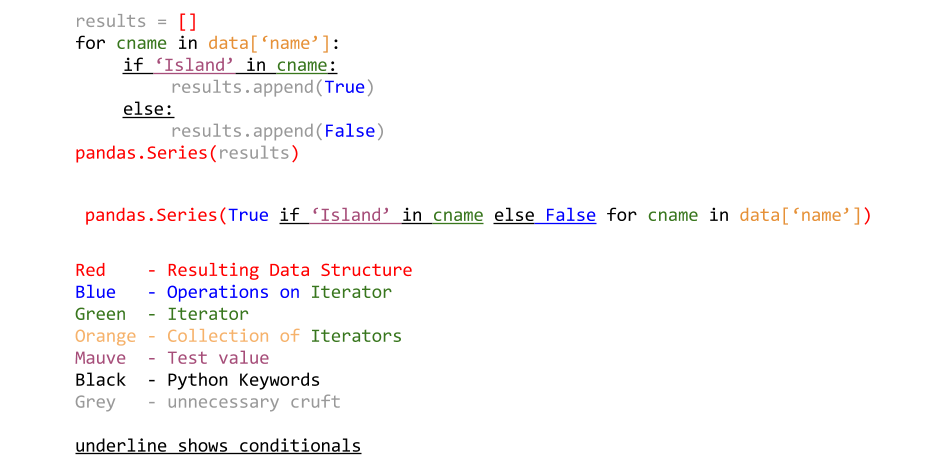

In [76]:
Image(filename='pandas_comp.png')

In [60]:
data[filt]

,Unnamed: 0,state,stfips,fips,name,class,rv,fullfips
80,80,AK,2,150,Kodiak Island Borough,H1,3.375346,2150
675,675,IL,17,161,Rock Island County,H1,3.164235,17161
2968,2968,WA,53,29,Island County,H1,5.481493,53029
3145,3145,AS,60,30,Rose Island,H4,4.644470,60030
3146,3146,AS,60,40,Swains Island,H4,2.616759,60040
3149,3149,MP,69,85,Northern Islands Municipality,H1,4.101695,69085
3231,3231,UM,74,300,Midway Islands,H4,4.867270,74300
3232,3232,VI,78,10,St. Croix Island,H4,3.932335,78010
3233,3233,VI,78,20,St. John Island,H4,3.819584,78020
3234,3234,VI,78,30,St. Thomas Island,H4,4.911567,78030


And there're all the counties with islands for their names. 

### Problem: Cities >> Islands

1. Using comprehensions, construct a filter that, when used on data, provides only counties with 'city' in their name. Store your result to a new dataframe. *hint: this is very similar to what we did above*
2. From this, select only cities with an `rv` above 4.

In [80]:
filt = pandas.Series(True if 'City' in cname else False for cname in data['name'])

In [81]:
data[filt]

,Unnamed: 0,state,stfips,fips,name,class,rv,fullfips
77,77,AK,2,110,Juneau City and Borough,H6,3.901668,2110
88,88,AK,2,220,Sitka City and Borough,H6,4.744370,2220
93,93,AK,2,275,Wrangell City and Borough,H1,2.113645,2275
94,94,AK,2,282,Yakutat City and Borough,H1,2.021157,2282
1763,1763,NV,32,510,Carson City,C7,3.143931,32510
2838,2838,VA,51,36,Charles City County,H1,1.942106,51036
2866,2866,VA,51,95,James City County,H1,1.811697,51095


In [79]:
newdata[newdata['rv'] > 4]

,Unnamed: 0,state,stfips,fips,name,class,rv,fullfips
88,88,AK,2,220,Sitka City and Borough,H6,4.74437,2220


## Iterators and `enumerate`

Sometimes it's useful to look closely at the way python stores values. 

In [82]:
a = 7

In [83]:
b = a

In [84]:
a = 9

Now, what is the value of `b`?

In [ ]:
b

Ok, reasonable. Now, let's look at doing this for lists:

In [86]:
lst = [1,2,3,4,5]

In [87]:
c = lst[0]

In [88]:
lst[0] = 9

So, what is the value of `c`?

In [89]:
c

1

### Example: Value vs. Reference

a classic difference in programming is the question of an object's reference vs. an object's value. In a way, you can think of this as a conflict between the "name" of an object and the actual value the object takes on.

In [90]:
names = ['bob', 'sue', 'cindy']

In [91]:
for n in names:
    print n

bob
sue
cindy


Say we wanted to capitalize these names:

In [93]:
for n in names:
    n = n.upper()
    print n

BOB
SUE
CINDY


So, how's our names doing?

In [101]:
names

['bob', 'sue', 'cindy']

:(

This is an example of a case where we have confused the *value* of `n` in each iteration with the *reference* that `n` makes to a position in a list. 

To resolve this ambiguity, we can use `enumerate` as a way to get around this:

In [94]:
for i, n in enumerate(names):
    names[i] = n.upper()
    print n.upper()

BOB
SUE
CINDY


In [105]:
names

['BOB', 'SUE', 'CINDY']

to show, when we use enumerate, this is what happens:

In [ ]:
for idx, value in enumerate(l):

In [95]:
for what_does_enumerate_return in enumerate(names):
    print what_does_enumerate_return

(0, 'BOB')
(1, 'SUE')
(2, 'CINDY')


So, enumerate returns a tuple, with the first element being an *index* (i.e. *reference*) and the secone element being a *value*. Since python does automatic tuple unpacking:

In [97]:
i, n = (0, 'BOB')
print 'i is', i, 'but n is', n

i is 0 but n is BOB


we can split that up in the iterator like `for i, n in enumerate(names)`, and `i` takes on the first value and `n` the second. 

### Example: Zip is your friend

Another useful tool is the `zip` function

In [98]:
?zip

So, say we had two lists. Maybe a list of names and grades:

In [114]:
names = ['bob', 'sue', 'cindy']
grades = [93, 96, 99]

In [115]:
names

['bob', 'sue', 'cindy']

In [116]:
grades

[93, 96, 99]

In [117]:
zip(names, grades)

[('bob', 93), ('sue', 96), ('cindy', 99)]

So, if we wanted to do a loop (or comprehension!!) that worked on the tuples that we get from zip, we could treat them just like the tuples we got from `enumerate` above: 

In [101]:
for name, grade in zip(names, grades):
    print name, grade

BOB 93
SUE 96
CINDY 99


Pretty nifty, huh? We can do this out to a large number of tuple indices:

In [120]:
capstones = ['Finished', 'In Progress', 'Never Started']
letters = ['A-', 'A', 'A+', 'I', 'a', 't', 'a' ,'f']

In [121]:
len(letters)

8

In [122]:
len(names)

3

In [124]:
zip(names, letters)

[('bob', 'A-'), ('sue', 'A'), ('cindy', 'A+')]

In [125]:
empty = []

In [126]:
zip(names, empty)

[]

In [127]:
n, l = ('robert', 'c+')

In [128]:
n

'robert'

In [129]:
l

'c+'

In [134]:
for idx in range(len(names)):
    name = names[idx]
    grade = grades[idx]
    status = capstones[idx]
    print name, grade, status

bob 93 Finished
sue 96 In Progress
cindy 99 Never Started


In [136]:
grades

[93, 96, 99]

In [138]:
=

93

In [139]:
z = zip(names, grades, capstones)

Zip also can take in iterables of different length, but it only outputs a zipped tuple as long as there are elements in each list. So, the shortest list governs the zip length:

In [142]:
print names, grades, capstones

['bob', 'sue', 'cindy'] [93, 96, 99] ['Finished', 'In Progress', 'Never Started']


In [110]:
zip(names, grades, capstones, letters)

[('BOB', 93, 'Finished', 'A-'),
 ('SUE', 96, 'In Progress', 'A'),
 ('CINDY', 99, 'Never Started', 'A+')]

In [125]:
spoiler = []

In [126]:
zip(names, spoiler)

[]

In [111]:
{name:{'grade':grade, 'letter':letter, 'progress':progress} for
    name, grade, letter, progress in zip(names, grades, letters, progresses)}

NameError: name 'progresses' is not defined

In [147]:
import pickle

In [152]:
?pickle.dump

In [153]:
import pandas

In [154]:
q = pandas.DataFrame()

In [156]:
q.to_json()

'{}'

In [157]:
q = pandas.read_csv('counties.txt')

In [158]:
q.to_json()

'{"Unnamed: 0":{"0":0,"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10":10,"11":11,"12":12,"13":13,"14":14,"15":15,"16":16,"17":17,"18":18,"19":19,"20":20,"21":21,"22":22,"23":23,"24":24,"25":25,"26":26,"27":27,"28":28,"29":29,"30":30,"31":31,"32":32,"33":33,"34":34,"35":35,"36":36,"37":37,"38":38,"39":39,"40":40,"41":41,"42":42,"43":43,"44":44,"45":45,"46":46,"47":47,"48":48,"49":49,"50":50,"51":51,"52":52,"53":53,"54":54,"55":55,"56":56,"57":57,"58":58,"59":59,"60":60,"61":61,"62":62,"63":63,"64":64,"65":65,"66":66,"67":67,"68":68,"69":69,"70":70,"71":71,"72":72,"73":73,"74":74,"75":75,"76":76,"77":77,"78":78,"79":79,"80":80,"81":81,"82":82,"83":83,"84":84,"85":85,"86":86,"87":87,"88":88,"89":89,"90":90,"91":91,"92":92,"93":93,"94":94,"95":95,"96":96,"97":97,"98":98,"99":99,"100":100,"101":101,"102":102,"103":103,"104":104,"105":105,"106":106,"107":107,"108":108,"109":109,"110":110,"111":111,"112":112,"113":113,"114":114,"115":115,"116":116,"117":117,"118":118,"119":119,"120

In [180]:
q = open('example.txt')

In [181]:
data = q.readlines()

In [182]:
data 

['hello!\n',
 'I am in a text file\n',
 'plaintext writing\n',
 '254\n',
 'this is the end of my file\n']

In [183]:
data2 = [st.strip('\n') for st in data]

In [ ]:
data3 = [st.strip()]

In [172]:
import csv 

In [173]:
import random

In [176]:
random.randint(0,1)

1